In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
vod = pd.read_csv('../data/vod89.csv')
vod

,userid,program,main_cat,sub_cat,score,category,rename
0,59879000,소방서 옆 경찰서,TV드라마,기타,0.244476,TV프로그램,소방서옆경찰서
1,59879000,신성한 이혼,TV드라마,기타,0.738281,TV프로그램,신성한이혼
2,59895000,금이야 옥이야,TV드라마,기타,1.000000,TV프로그램,금이야옥이야
3,59900000,2022 역사저널 그날,TV 시사/교양,기타,0.215482,TV프로그램,2022역사저널그날
4,59900000,그것이알고싶다,TV 시사/교양,기타,0.374741,TV프로그램,그것이알고싶다
...,...,...,...,...,...,...,...
1494,67140000,경남 통영 2부,우리동네,연예/오락,0.292893,TV프로그램,경남통영2부
1495,67140000,밀수,영화,액션/어드벤쳐,0.250000,영화,밀수
1496,67140000,잠자는 숲속의 공주,키즈,기타,0.292893,키즈,잠자는숲속의공주
1497,67148000,타요의 씽씽극장 동요2,키즈,기타,0.988951,키즈,타요의씽씽극장동요2


In [4]:
vod_id = pd.read_csv('../data/vod_add_id.csv', index_col=0)
vod_id = vod_id[['rename', 'Category', 'vod_id']]
vod_id.columns = ['rename', 'category', 'vod_id']
vod_id

,rename,category,vod_id
0,와이낫크루뜻밖의여행,TV프로그램,0
1,그레이트뷰티,영화,1
2,해안선,영화,2
3,아는형님,TV프로그램,3
4,베놈,영화,4
...,...,...,...
4710,베놈2:렛데어비카니지,영화,4710
4711,성월동화,영화,4711
4712,다큐인사이트코드블루,TV프로그램,4712
4713,캠프제로베이스원,TV프로그램,4713


In [5]:
vod1 = vod.merge(vod_id, on = ['rename', 'category'], how = 'left')
userid = pd.DataFrame(vod1['userid'].unique())
userid.columns = ['userid']
userid['user_id'] = userid.index

vod1 = vod1.merge(userid, on = ['userid'], how = 'left')
vod1

,userid,program,main_cat,sub_cat,score,category,rename,vod_id,user_id
0,59879000,소방서 옆 경찰서,TV드라마,기타,0.244476,TV프로그램,소방서옆경찰서,2092,0
1,59879000,신성한 이혼,TV드라마,기타,0.738281,TV프로그램,신성한이혼,1190,0
2,59895000,금이야 옥이야,TV드라마,기타,1.000000,TV프로그램,금이야옥이야,784,1
3,59900000,2022 역사저널 그날,TV 시사/교양,기타,0.215482,TV프로그램,2022역사저널그날,572,2
4,59900000,그것이알고싶다,TV 시사/교양,기타,0.374741,TV프로그램,그것이알고싶다,297,2
...,...,...,...,...,...,...,...,...,...
1494,67140000,경남 통영 2부,우리동네,연예/오락,0.292893,TV프로그램,경남통영2부,4396,329
1495,67140000,밀수,영화,액션/어드벤쳐,0.250000,영화,밀수,2865,329
1496,67140000,잠자는 숲속의 공주,키즈,기타,0.292893,키즈,잠자는숲속의공주,689,329
1497,67148000,타요의 씽씽극장 동요2,키즈,기타,0.988951,키즈,타요의씽씽극장동요2,880,330


In [6]:
vod1.to_csv('../data/vod_score.csv', index = 0)

In [14]:
vod_score = pd.read_csv('../data/vod_score.csv')
vod_score = vod_score[['user_id', 'vod_id', 'score']]
vod_score

,user_id,vod_id,score
0,0,572,0.215482
1,0,297,0.374741
2,0,149,0.292893
3,0,2537,0.292893
4,0,3314,0.292893
...,...,...,...
1040,74,13,0.132597
1041,74,315,0.952381
1042,74,16,0.100000
1043,74,341,0.292893


In [147]:
# vod_score['score'] = pd.cut(vod_score['score'], bins = [0,0.2,0.4,0.6,0.8, 1], labels = [1,2,3,4,5])
# vod_score

,user_id,vod_id,score
0,0,572,2
1,0,297,2
2,0,149,2
3,0,2537,2
4,0,3314,2
...,...,...,...
1040,74,13,1
1041,74,315,5
1042,74,16,1
1043,74,341,2


<Axes: >

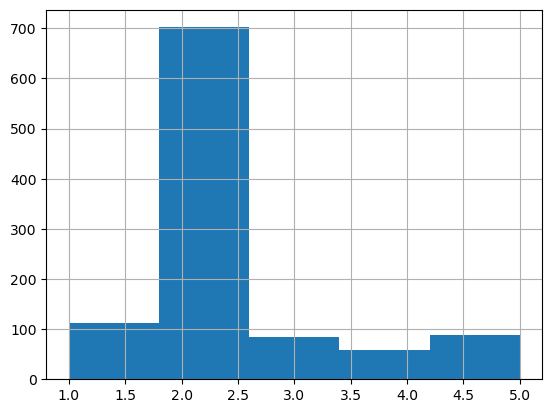

In [148]:
# import matplotlib.pyplot as plt
# vod_score.score.hist(bins = 5)

In [15]:
from sklearn.model_selection import train_test_split

vod_train, vod_test = train_test_split(vod_score, test_size = 0.2, stratify=vod_score['user_id'], random_state = 42)
vod_train

,user_id,vod_id,score
1041,74,315,0.952381
760,63,1624,0.292893
610,45,796,0.949072
204,13,2058,0.292893
745,62,23,0.292893
...,...,...,...
922,69,686,0.292893
592,43,16,0.025641
404,29,4103,0.646447
8,1,1190,0.082031


In [205]:
from sklearn.utils import shuffle
TRAIN_SIZE = 0.75
vod_score = shuffle(vod_score)
cutoff = int(TRAIN_SIZE * len(vod_score))

vod_train = vod_score.iloc[:cutoff]
vod_test = vod_score.iloc[cutoff:]

In [143]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adamax

# variable 초기화
K = 100
mu = vod_train.score.mean()
M = vod_score.user_id.max() + 1
N = vod_score.vod_id.max() + 1

# Defining RMSE measure
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# Keras model
user = Input(shape = (1,))  # User input
item = Input(shape = (1,))  # Item input
P_embedding = Embedding(M, K, embeddings_regularizer = l2())(user)  # (M, 1, K)
Q_embedding = Embedding(N, K, embeddings_regularizer = l2())(item)  # (N, 1, K)
user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user) # User bias term (M, 1, )
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item) # Item bias term (N, 1, )

# Concatenate layers
from tensorflow.keras.layers import Dense, Concatenate, Activation
P_embedding = Flatten()(P_embedding)    # (K, )
Q_embedding = Flatten()(Q_embedding)    # (K, )
user_bias = Flatten()(user_bias)    # (1, )
item_bias = Flatten()(item_bias)    # (1, )
R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias]) # (2K + 2, )

# Neural network
R = Dense(1024)(R)
R = Activation('relu')(R)
R = Dense(256)(R)
R = Activation('linear')(R)
R = Dense(1)(R)

# # R = Dot(axes = 2)([P_embedding, Q_embedding])
# R = layers.dot([P_embedding, Q_embedding], axes = 2)    # (1, 1, 1)
# # R = Add()([R, user_bias, item_bias])
# R = layers.add([R, user_bias, item_bias])
# R = Flatten()(R)    # (1, 1)

# Model setting
model = Model(inputs = [user, item], outputs = R)
model.compile(
    loss = RMSE,
    optimizer = SGD(),
    metrics = [RMSE]
)
model.summary()

# Model fitting
result = model.fit(
    x = [vod_train.user_id.values, vod_train.vod_id.values],
    y = vod_train.score.values - mu,
    epochs = 200,
    batch_size = 256,
    validation_data = (
        [vod_test.user_id.values, vod_test.vod_id.values],
        vod_test.score.values - mu
    )
)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 input_18 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_32 (Embedding)    (None, 1, 100)               7500      ['input_17[0][0]']            
                                                                                                  
 embedding_33 (Embedding)    (None, 1, 100)               470100    ['input_18[0][0]']            
                                                                                            

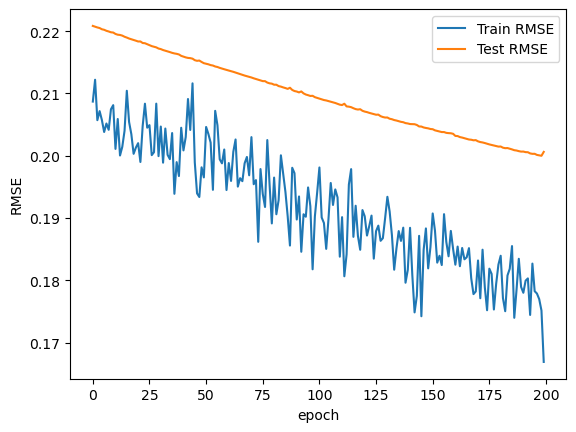

In [144]:
# Plot RMSE
import matplotlib.pyplot as plt
plt.plot(result.history['RMSE'], label = 'Train RMSE')
plt.plot(result.history['val_RMSE'], label = 'Test RMSE')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [133]:
user = list(set(vod_train.user_id.values))
result_1 = pd.DataFrame()
for id in user:
    temp = model.predict([np.array([id] * vod_score.vod_id.nunique()), vod_score.vod_id.unique()])
    predict_1 = pd.DataFrame(temp.ravel().tolist(), vod_score.vod_id.unique()).reset_index()
    predict_1.columns = ['vod_id', 'value']
    predict_1 = predict_1.sort_values(by = 'value', ascending=False).vod_id.values
    predict_1 = pd.DataFrame([predict_1])
    result_1 = pd.concat([result_1, predict_1])

result_1.index = user
result_1 = result_1.apply(lambda x : x.tolist(), axis = 1)
result_1 = result_1.reset_index()
result_1.columns = ['user_id', 'vod_id']
result_1

23/23 [==============================] - 0s 2ms/step


,user_id,vod_id
0,0,"[1156, 410, 111, 1166, 1233, 848, 2402, 112, 8..."
1,1,"[1156, 111, 410, 1166, 1233, 992, 848, 112, 24..."
2,2,"[1156, 111, 410, 992, 1166, 1233, 954, 848, 88..."
3,3,"[1156, 111, 410, 1166, 1233, 848, 112, 884, 24..."
4,4,"[1156, 111, 410, 1166, 1086, 1233, 992, 884, 7..."
...,...,...
70,70,"[1156, 111, 410, 1233, 1166, 848, 112, 2092, 9..."
71,71,"[1156, 111, 410, 1166, 1233, 112, 884, 848, 24..."
72,72,"[1156, 111, 410, 848, 1166, 1233, 112, 2402, 9..."
73,73,"[1156, 111, 410, 1166, 1233, 848, 112, 992, 24..."


In [134]:
TVpro_kids = vod_id[(vod_id['category'] == 'TV프로그램') | (vod_id['category'] == '키즈')].vod_id.unique().tolist()
movie = vod_id[vod_id['category'] == '영화'].vod_id.values.tolist()

# 시청한 영화는 추천에서 뺴고,
# 시청한 TV프로그램이나 키즈는 추천에 포함시킨다.

k = 10
result_2 = pd.DataFrame()
for i in user:
    li = []
    watched_list = vod_train[vod_train.user_id == i].vod_id.values.tolist() # 해당 유저가 시청한 프로그램
    rec_list = result_1[result_1['user_id'] == i]['vod_id'].tolist()[0]
    for x in rec_list:
        if len(li) == k:
            break

        if x not in watched_list:
            li.append(x)
        elif x in watched_list and x in TVpro_kids:
            li.append(x)
        elif x in watched_list and x in movie:
            continue

    result_2 = pd.concat([result_2, pd.DataFrame(li).T], axis = 0)


result_2.index = user
result_2 = result_2.apply(lambda x : x.tolist(), axis = 1)
result_2 = result_2.reset_index()
result_2.columns = ['user_id', 'vod_id']
result_2

,user_id,vod_id
0,0,"[1156, 410, 111, 1166, 1233, 848, 2402, 112, 8..."
1,1,"[1156, 111, 410, 1166, 1233, 992, 848, 112, 24..."
2,2,"[1156, 111, 410, 992, 1166, 1233, 954, 848, 88..."
3,3,"[1156, 111, 410, 1166, 1233, 848, 112, 884, 24..."
4,4,"[1156, 111, 410, 1166, 1086, 1233, 992, 884, 7..."
...,...,...
70,70,"[1156, 111, 410, 1233, 1166, 848, 112, 2092, 9..."
71,71,"[1156, 111, 410, 1166, 1233, 112, 884, 848, 24..."
72,72,"[1156, 111, 410, 848, 1166, 1233, 112, 2402, 9..."
73,73,"[1156, 111, 410, 1166, 1233, 848, 112, 992, 24..."


In [135]:
testdata = vod_test.groupby('user_id')['vod_id'].unique().reset_index()
testdata

,user_id,vod_id
0,0,[3314]
1,1,[456]
2,2,"[2038, 849, 887, 976]"
3,3,"[747, 2712]"
4,4,"[2040, 1070, 3203, 4117, 778, 303]"
...,...,...
70,70,"[835, 256, 542, 580]"
71,71,"[107, 784, 2283, 2466, 2230, 2908, 1362, 2273,..."
72,72,"[2341, 4380]"
73,73,[1981]


In [136]:
# precision@15
def precision_k(testdata, recommended_data, K = k):
    merge_df = pd.merge(testdata, recommended_data, on='user_id', how = 'left', suffixes=('_actual', '_rec'))
    merge_df = merge_df.dropna()
    precision_value = 0
    for i in range(merge_df.shape[0]):
        temp = len(set(merge_df.iloc[i,1]).intersection(set(merge_df.iloc[i, 2]))) / K
        precision_value += temp
        
    return precision_value / merge_df.shape[0]

precision_k(testdata, result_2)

0.005333333333333334

In [127]:
result_1.to_csv('../data/result_1.csv', index = 0)
testdata.to_csv('../data/testdata.csv', index = 0)
